# Обработка данных

## Загрузка необходимых библиотек

Для работы нам понадобятся две библиотеки:
1. `pandas`: при помощи нее мы считаем из файла таблицу с данными
2. `matplotlib`: библиотека для визуализации данных
3. `sklearn`: библиотека инструментов для анализа данных и машинного обучения

In [20]:
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
plt.style.use('ggplot')

## Загрузка данных
- x - обучающая выборка
- y - ответы (победила ли команда Radiant в драке)

In [86]:
data = pd.read_csv('data.csv')
le = preprocessing.LabelEncoder()
le.fit(['Product', 'Mobile', 'Game Designer', 'FrontEnd', 'Data Scientist',
       'Qa', 'Другое', 'BackEnd', 'Software Architect', 'Security',
       'Data Architect', 'Systemcoder', 'Evangelist', 'robot', 'Portable'])

del data['Отметка времени']

datd=data[data['Какая у Вас профессия, должность в Вашей компании?']!='Другое']

data = data.fillna('Другое')

print(data)
for column in data[2:]:
    m=pd.unique(data[column])
    try:
        le = preprocessing.LabelEncoder()
        le.fit(m)
        data[column]=le.transform(data[column])
#         print(m)
    except:
        1

    

data_y=data['Какая у Вас профессия, должность в Вашей компании?']
del data['Какая у Вас профессия, должность в Вашей компании?']
data_x=data




    Какая у Вас профессия, должность в Вашей компании?  \
0                                              Product   
1                                               Mobile   
2                                        Game Designer   
3                                               Mobile   
4                                             FrontEnd   
5                                       Data Scientist   
6                                                   Qa   
7                                             FrontEnd   
8                                                   Qa   
9                                               Другое   
10                                            FrontEnd   
11                                                  Qa   
12                                              Другое   
13                                             BackEnd   
14                                  Software Architect   
15                                      Data Scientist   
16            

In [ ]:
fig = plt.figure()

width = .35
ind = np.arange(len(OY))
plt.bar(ind, OY, width=width)
plt.xticks(ind + width / 2, OX)

fig.autofmt_xdate()

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(data_x, data_y, test_size=.15, random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =500,max_depth =6)
model.fit(x_train,y_train)
(model.predict(x_train)==y_train).mean()

0.8959276018099548

Список признаков, которые будут использованы в модели

import catboost as cb
clf = cb.CatBoostClassifier(iterations=900, bootstrap_type='Bayesian',depth=5)
clf.fit(x_train,y_train)
(clf.predict(x_train)==y_train).mean()

Важность признаков

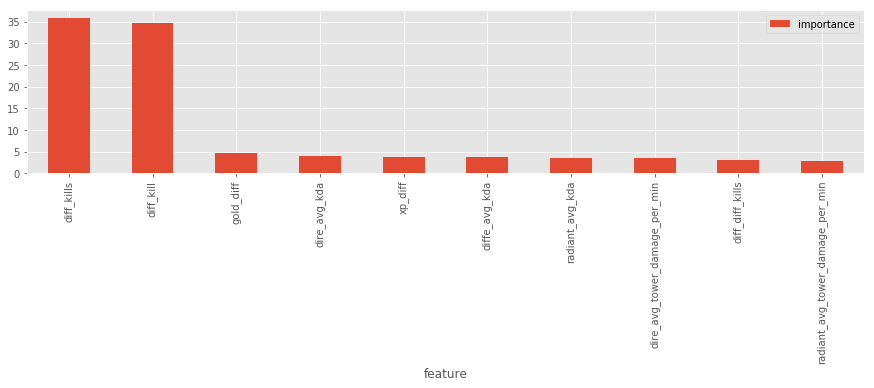

,importance
feature,
diff_kills,35.914494
diff_kill,34.836713
gold_diff,4.599722
dire_avg_kda,3.895069
xp_diff,3.821042
diffe_avg_kda,3.810312
radiant_avg_kda,3.555528
dire_avg_tower_damage_per_min,3.479375
diff_diff_kills,3.160223


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

import numpy as np
if hasattr(clf, 'coef_'):
    df_importances = sorted(list(zip(Xi.columns, clf.coef_.ravel())), key=lambda tpl: tpl[1], reverse=True)
else:
    df_importances= sorted(list(zip(Xi.columns, np.array(clf.feature_importances_).ravel())), key=lambda tpl: tpl[1], reverse=True)
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = df_importances.set_index('feature')
df_importances.plot(kind='bar', figsize=(15, 3))
plt.show()
display(df_importances)

# Отправка результатов на проверку

## Загрузка данных
- x_test - тестовый набор данных
- y_submission - прогноз для тестовой выборки, который отправляется на проверку

In [10]:
x = pd.read_csv('data/test.csv', index_col=0)
y_submission = pd.read_csv('data/submission.csv', index_col=0)


columns_with_single_value = [col for col in x.columns if x[col].unique().shape[0] == 1]
x = x.drop(columns_with_single_value, axis=1)

submission_path = 'data/table_pand_test.csv'
pand=pd.read_csv(submission_path)

x=data(x)

x['dt_kil'] = x['xp_diff']
x['ods']=x['xp_diff']
for i in range(49088, 98177):
    x['dt_kil'][i] = pand['0'][i-49088]
    

Xi = pd.DataFrame()

Xi = work_data(Xi,x)


x_train = Xi


x_train = x_train.fillna(0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


y_submission['radiant_won'] = clf.predict(x_train)

import time
import os
current_timestamp = (clf.predict(x_validation)==y_validation).mean()

if not os.path.exists('submissions'):
    os.makedirs('submissions')

print(submission_path)



y_submission.to_csv(submission_path, index=True)


answer_log+/0.7290874524714829.csv


In [11]:
def prov(x_test):
    res = pd.read_csv('data/ok_test.csv', index_col=0)['radiant_won']
    a=(clf.predict(x_test)==res).mean()
    return a
prov(x_train)

0.9586057976328709

Конец